In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',95)
pd.set_option('display.max_rows', None)
from __future__ import print_function

In [2]:
df2 = pd.read_csv('main_df2.csv.gz')

In [3]:
df2.shape

(20095649, 10)

In [4]:
df2.head()

,invoice/item_number,date,store_number,item_number,item_description,bottles_sold,sale_dollars,volume_sold_liters,store_name2,category_name2
0,INV-11049300044,2018-03-22,4958,56843,Bacardi Party Drinks Zombie,3,31.41,5.25,Five Corners Liquor & Wine,cocktails
1,INV-11058000109,2018-03-22,5162,43031,Bacardi Gold Rum Mini,1,8.31,0.50,Urbandale Liquor,rum
2,INV-11064700013,2018-03-22,3806,36308,Hawkeye Vodka,6,64.56,10.50,Target Store T-1901 / Wdm,vodka
3,INV-11034800060,2018-03-21,2603,89178,El Mayor Anejo Tequila,6,157.50,4.50,Hy-Vee Wine and Spirits / Bettendorf,tequila
4,INV-11095900025,2018-03-26,5350,68034,Baileys Original Irish Cream,3,31.50,1.12,Casey's General Store # 3562/ Marion,cordials liqueurs


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095649 entries, 0 to 20095648
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   invoice/item_number  object 
 1   date                 object 
 2   store_number         int64  
 3   item_number          object 
 4   item_description     object 
 5   bottles_sold         int64  
 6   sale_dollars         float64
 7   volume_sold_liters   float64
 8   store_name2          object 
 9   category_name2       object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.5+ GB


In [6]:
df2['date'] = pd.to_datetime(df2['date'])
test_A = df2[['date', 'category_name2', 'bottles_sold', 'volume_sold_liters']]\
.groupby([pd.Grouper(key='date', freq='M'), 'category_name2']).sum()

In [7]:
test_A

bottles_sold  volume_sold_liters
date       category_name2                                     
2012-01-31 accessories                1829             2574.76
           brandy                    71967            40230.53
           cocktails                 35379            50729.25
           cordials liqueurs        107586            88109.29
           gin                       46827            37502.92
           grain alcohol              3800             2850.00
           rum                      180254           172971.70
           schnapps                  78348            71393.21
           special orders               12                9.00
           spirits                    9445             9261.75
           tequila                   52005            43159.41
           vodka                    365286           355927.94
           whiskey                  349493           337362.73
2012-02-29 accessories                 557              669.74
           brandy                    83090            43123.93
           cocktails                 29705            43200.46
           cordials liqueurs        126781           103450.37
           gin                       52158            41282.70
           grain alcohol              2998             2278.50
           rum                      195347           198715.96
           schnapps                  76857            70916.13
           spirits                   10661            10545.50
           tequila                   60649            50302.59
           vodka                    377666           363713.74
           whiskey                  441355           458366.91
2012-03-31 accessories                1907             1344.50
           brandy                    81131            41333.97
           cocktails                 36967            54199.49
           cordials liqueurs        123310           100595.92
           gin                       56662            44348.61
           grain alcohol              3109             2296.35
           rum                      208190           206784.04
           schnapps                  78297            72021.68
           spirits                   12943            12804.50
           tequila                   61232            50656.13
           vodka                    412095           399445.92
           whiskey                  382822           367041.38
2012-04-30 accessories                1726             1094.04
           brandy                    83601            43460.16
           cocktails                 68064           103545.39
           cordials liqueurs        132736           108834.01
           gin                       62549            50261.62
           grain alcohol              3395             2510.85
           rum                      214784           214861.23
           schnapps                  77805            71884.62
           spirits                    9039             8793.00
           tequila                   80218            67546.10
           vodka                    443743           425155.58
           whiskey                  411254           401620.18
2012-05-31 accessories                1283              818.93
           brandy                    87468            45033.42
           cocktails                 64544            95154.19
           cordials liqueurs        138729           112311.51
           gin                       71114            57528.30
           grain alcohol              3405             2583.75
           rum                      258237           255598.53
           schnapps                  80501            74014.64
           spirits                   12613            12409.00
           tequila                   85021            71550.88
           vodka                    501372           481132.33
           whiskey                  477888           501297.41
2012-06-30 accessories               11549            16499.0

In [8]:
df2.isnull().sum()

invoice/item_number     0
date                    0
store_number            0
item_number             0
item_description        0
bottles_sold            0
sale_dollars           10
volume_sold_liters      0
store_name2             0
category_name2          0
dtype: int64

In [9]:
# Converting test_A from a dataframe to a numpy array
x = test_A.iloc[:, [0, 1]].values

In [10]:
# Resetting index 
test_B=test_A.reset_index().pivot(index='date', columns='category_name2', \
                        values='bottles_sold')

In [11]:
test_B.head()

category_name2,accessories,brandy,cocktails,cordials liqueurs,gin,grain alcohol,rum,schnapps,special orders,spirits,tequila,vodka,whiskey
date,,,,,,,,,,,,,
2012-01-31,1829.0,71967.0,35379.0,107586.0,46827.0,3800.0,180254.0,78348.0,12.0,9445.0,52005.0,365286.0,349493.0
2012-02-29,557.0,83090.0,29705.0,126781.0,52158.0,2998.0,195347.0,76857.0,NaN,10661.0,60649.0,377666.0,441355.0
2012-03-31,1907.0,81131.0,36967.0,123310.0,56662.0,3109.0,208190.0,78297.0,NaN,12943.0,61232.0,412095.0,382822.0
2012-04-30,1726.0,83601.0,68064.0,132736.0,62549.0,3395.0,214784.0,77805.0,NaN,9039.0,80218.0,443743.0,411254.0
2012-05-31,1283.0,87468.0,64544.0,138729.0,71114.0,3405.0,258237.0,80501.0,NaN,12613.0,85021.0,501372.0,477888.0


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.set_params(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [13]:
kmeans.cluster_centers_

array([[ 54534.24155578,  44071.83654043],
       [602509.27      , 541769.47239999],
       [234091.05479452, 220138.02479452]])

In [14]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

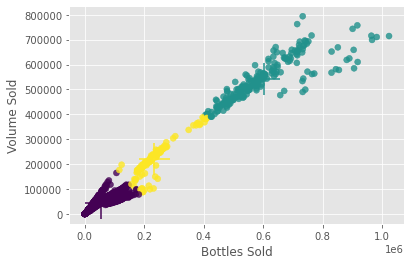

In [15]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Bottles Sold')
plt.ylabel('Volume Sold')
plt.show()

In [16]:
from PlottingFunctions import plot_inertia, plot_silhouette

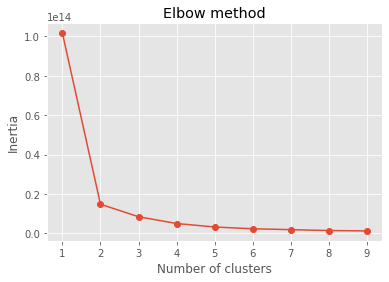

In [17]:
plot_inertia(kmeans, x, range(1, 10))

In [18]:
# According to the above Elbow Chart, the data would be better with n=2 clusters
kmeans.set_params(n_clusters=2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [19]:
kmeans.cluster_centers_

array([[588562.69626168, 530478.51425232],
       [ 73946.51487827,  63146.82448151]])

In [20]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 0])

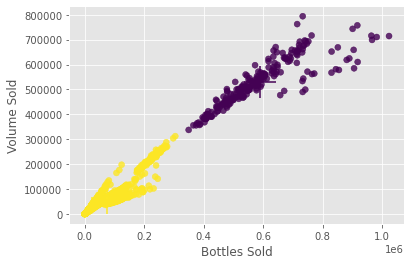

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1])
plt.xlabel('Bottles Sold')
plt.ylabel('Volume Sold')
plt.show()